## Goal: Predict trip count for 10 stations

#### - import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from neuralprophet import NeuralProphet, set_log_level
from neuralprophet import set_random_seed
set_random_seed(10)
set_log_level("ERROR", "INFO")

#### - data import

In [3]:
# df_wdc refers to the aggregated dataframe containing hourly total count for each station.
# the aggregation was done separately
# Neural Prophet requires consecutive datetime (e.g. if we want to calculate hourly prediction, 
# each hour should be present in datetime coulmn whether respective hour contains data or not )
df_wdc = pd.read_csv('./region_wise_data/df_wdc.csv')

In [4]:
# fill missing values with 0 for additional the hours
df_wdc = df_wdc.fillna(value= 0)

In [186]:
df_wdc

,31100.0,31101.0,31102.0,31103.0,31104.0,31105.0,31106.0,31107.0,31108.0,31109.0,...,31819.0,31820.0,31822.0,31823.0,31824.0,31825.0,31826.0,31827.0,y,_year
2010-09-20 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010
2010-09-20 12:00:00,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2010
2010-09-20 13:00:00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2010
2010-09-20 14:00:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2010
2010-09-20 15:00:00,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28 19:00:00,0.0,7.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,301.0,2022
2022-02-28 20:00:00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,2022
2022-02-28 21:00:00,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.0,2022
2022-02-28 22:00:00,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,2022


In [5]:
# convert station-wise counts in float
df_wdc.loc[:, df_wdc.columns != 'ds'].astype(float)

,31100.0,31101.0,31102.0,31103.0,31104.0,31105.0,31106.0,31107.0,31108.0,31109.0,...,31817.0,31818.0,31819.0,31820.0,31822.0,31823.0,31824.0,31825.0,31826.0,31827.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100304,0.0,7.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100305,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100306,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100307,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### - get 10 most popular station

In [7]:
df_wdc = df_wdc.set_index('ds')
df_wdc['y'] = df_wdc.apply(np.sum, axis=1)
df_group = df_wdc
df_group.index = pd.to_datetime(df_group.index.values)
df_group['_year'] = df_group.index.values
df_group['_year']= df_group['_year'].dt.strftime('%Y')
df_group_year = df_group.groupby('_year').sum().drop('y', axis=1)
sum = df_group_year.mean()
top_10 = sum.sort_values().tail(10).keys()
top_10

#### - model with iteration on multiple location

In [ ]:
station_list = list(top_10) # create list from the top_10 stations
yhatx = [] # empty list to append prediction from each single statio
for i in range(len(station_list)): 
    df = df_wdc[station_list[i]].rename('y') # rename column name of station to 'y'
    df.index = df.index.rename('ds') # change index name to 'ds'
    df = df.reset_index()
    # create model for a single station
    m = NeuralProphet(
        growth='linear',
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        n_lags=3*24,
        learning_rate=0.01,
    )
    # add special feature
    m.add_country_holidays('US')
    df_train, df_test = m.split_df(df, freq='H', valid_p = 0.10) # split df for validation test

    metrics = m.fit(df_train, freq='H', validation_df=df_test, progress='plot') # fitting model for train data

    dates_df = pd.DataFrame({'ds':pd.date_range('2022-03-01 00:00:00', periods=768, freq='H'), 
                    'y':'0.0'}) # create prediction data for 01.03.2022 to 01.04.2022
    forecast2 = m.predict(dates_df) 

    if i == 0:
        yhatx.append(forecast2['ds'])
    yhatx.append(forecast2['yhat1'])

#### - result exploration

In [192]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
58,0.018862,2.636663,4.392654,0.0,0.011316,2.162405,3.350069


<AxesSubplot:>

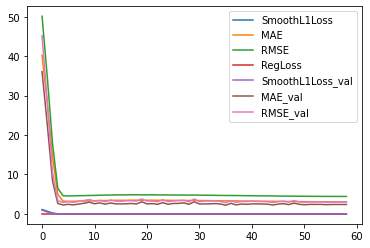

In [239]:
metrics.plot()

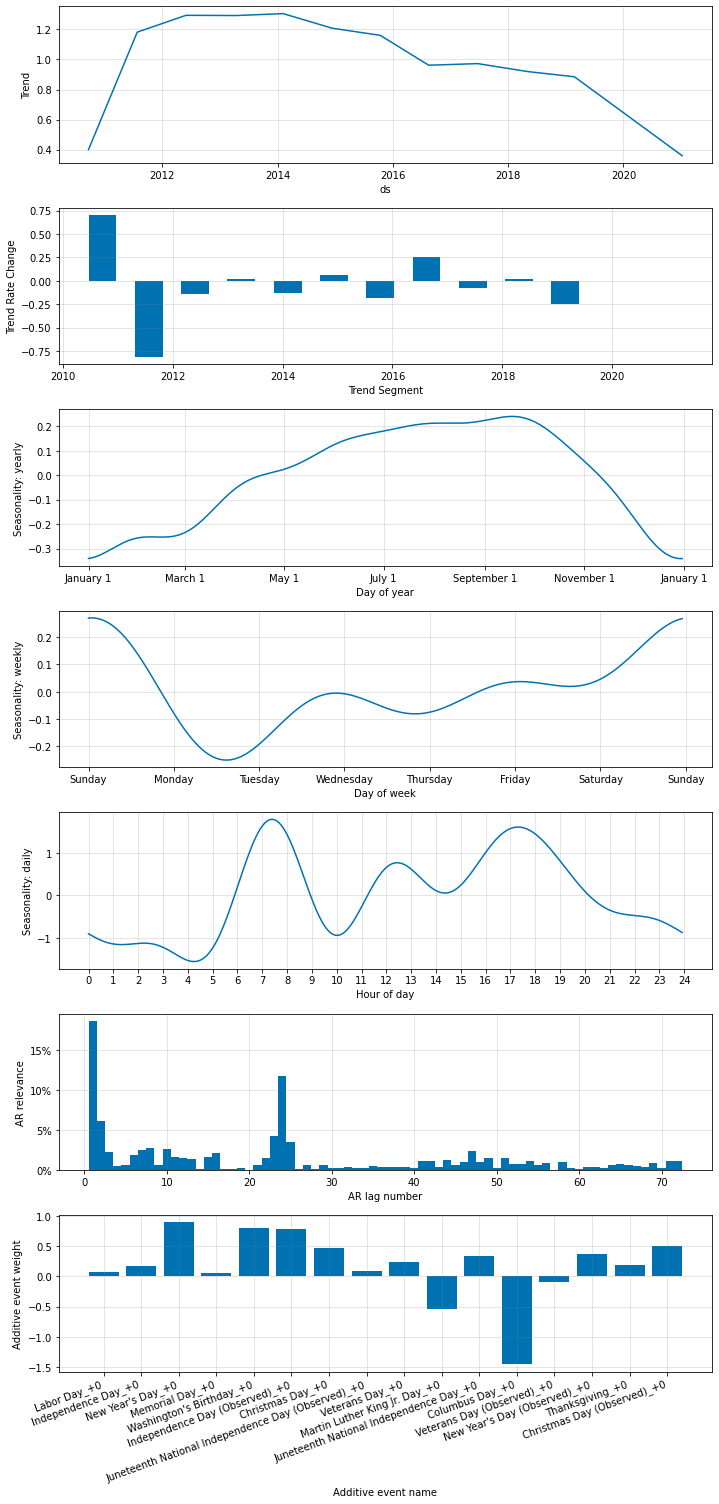

In [217]:
fig_param = m.plot_parameters()

In [ ]:
fig = m.plot(forecast['31247.0'][-50:])

#### - create dataframe from the result

In [219]:
yhatx_df = pd.DataFrame(yhatx).T

In [220]:
yhatx_df['ds'] = dates_df['ds']
yhatx_df.columns = ['ds']+station_list

In [226]:
yhatx_df

,ds,31248.0,31214.0,31241.0,31101.0,31229.0,31247.0,31201.0,31258.0,31200.0,31623.0
0,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
763,2022-04-01 19:00:00,-0.885271,0.790895,0.006333,1.196349,1.316059,-0.665281,1.752296,0.391426,0.089453,-2.501931
764,2022-04-01 20:00:00,-0.581504,0.082813,-0.216606,0.649029,0.009783,-0.026161,0.488270,-0.192807,-0.595922,-2.880920
765,2022-04-01 21:00:00,0.145762,-0.357922,-0.486923,0.115713,-0.516597,0.559479,-0.467092,0.060125,-0.703804,-2.812541
766,2022-04-01 22:00:00,0.349359,-0.479338,-0.873383,0.063705,-0.356708,0.551137,-0.883927,0.662172,-1.017088,-3.122116


In [232]:
# round values of the results
yhatx_df2 = yhatx_df.copy()
for i in range(1,  11):
    col = yhatx_df2.iloc[:, i].values
    col = np.array([np.round(xcl, 3) for xcl in col])
    yhatx_df2.iloc[:, i] = col
    nx = np.where(col < 0)[0]
    yhatx_df2.iloc[nx, i] = 0

In [243]:
yhatx_df2.tail(24)

,ds,31248.0,31214.0,31241.0,31101.0,31229.0,31247.0,31201.0,31258.0,31200.0,31623.0
744,2022-04-01 00:00:00,0.000,0.000,0.000,0.000,0.000,0.110,0.000,0.000,0.000,0.000
745,2022-04-01 01:00:00,0.143,0.000,0.000,0.000,0.000,0.164,0.000,0.000,0.000,0.000
746,2022-04-01 02:00:00,0.042,0.000,0.000,0.000,0.000,0.048,0.000,0.143,0.000,0.000
747,2022-04-01 03:00:00,0.000,0.000,0.000,0.000,0.000,0.052,0.000,0.036,0.000,0.000
748,2022-04-01 04:00:00,0.000,0.000,0.000,0.000,0.000,0.043,0.000,0.000,0.000,0.000
749,2022-04-01 05:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
750,2022-04-01 06:00:00,0.000,0.183,0.000,0.490,1.533,0.000,0.000,0.244,0.000,1.572
751,2022-04-01 07:00:00,0.000,1.618,1.369,2.466,2.792,0.050,1.590,0.336,0.225,3.714
752,2022-04-01 08:00:00,0.102,1.409,2.710,1.969,1.424,0.273,1.383,0.000,1.697,2.287
753,2022-04-01 09:00:00,0.000,0.000,1.603,0.000,0.000,0.055,0.000,0.000,1.035,0.000


In [247]:
# get hourly some for each station
yhatx_df2 = yhatx_df2.set_index('ds')
yhatx_df3 = yhatx_df2.T
yhatx_df3['sum'] = yhatx_df3.apply(np.sum, axis=1)

In [329]:
yhatx_df3

ds,2022-03-01 00:00:00,2022-03-01 01:00:00,2022-03-01 02:00:00,2022-03-01 03:00:00,2022-03-01 04:00:00,2022-03-01 05:00:00,2022-03-01 06:00:00,2022-03-01 07:00:00,2022-03-01 08:00:00,2022-03-01 09:00:00,...,2022-04-01 15:00:00,2022-04-01 16:00:00,2022-04-01 17:00:00,2022-04-01 18:00:00,2022-04-01 19:00:00,2022-04-01 20:00:00,2022-04-01 21:00:00,2022-04-01 22:00:00,2022-04-01 23:00:00,sum
31248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.391,2.128,1.704,0.158,0.000,0.000,0.146,0.349,0.292,192.919
31214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.218,0.983,1.540,1.416,0.791,0.083,0.000,0.000,0.000,246.404
31241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0.838,1.413,0.745,0.006,0.000,0.000,0.000,0.000,274.662
31101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.859,1.522,1.635,1.459,1.196,0.649,0.116,0.064,0.066,366.341
31229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.709,1.257,1.942,2.167,1.316,0.010,0.000,0.000,0.000,399.871
31247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.649,2.093,1.322,0.000,0.000,0.000,0.559,0.551,0.524,267.289
31201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.053,1.232,2.390,2.586,1.752,0.488,0.000,0.000,0.000,355.623
31258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.862,1.156,1.386,1.150,0.391,0.000,0.060,0.662,0.682,286.583
31200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0.971,2.494,1.709,0.089,0.000,0.000,0.000,0.000,227.729
31623.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,1.204,1.719,0.000,0.000,0.000,0.000,0.000,0.000,352.307


In [332]:
yhatx_df_plot = yhatx_df3.drop('sum', axis =1)
yhatx_df_plot = yhatx_df_plot.T
yhatx_df_plot['sum'] = yhatx_df_plot.apply(np.sum, axis=1)

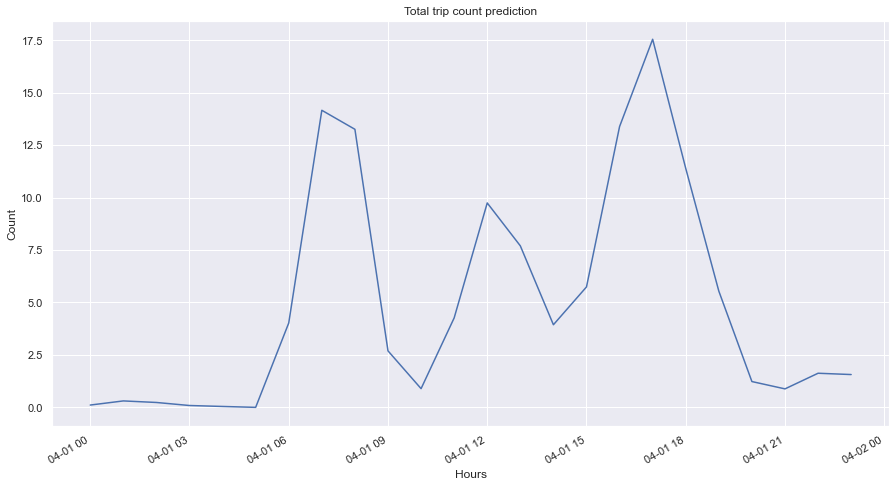

In [372]:
# visualize total prediction for last 24 hours
yhatx_df_plot['sum'].tail(24).plot()
plt.xlabel("Hours")
plt.ylabel("Count")
plt.title("Total trip count prediction") # You can comment this line out if you don't need title
plt.show(fig)

<AxesSubplot:xlabel='ds'>

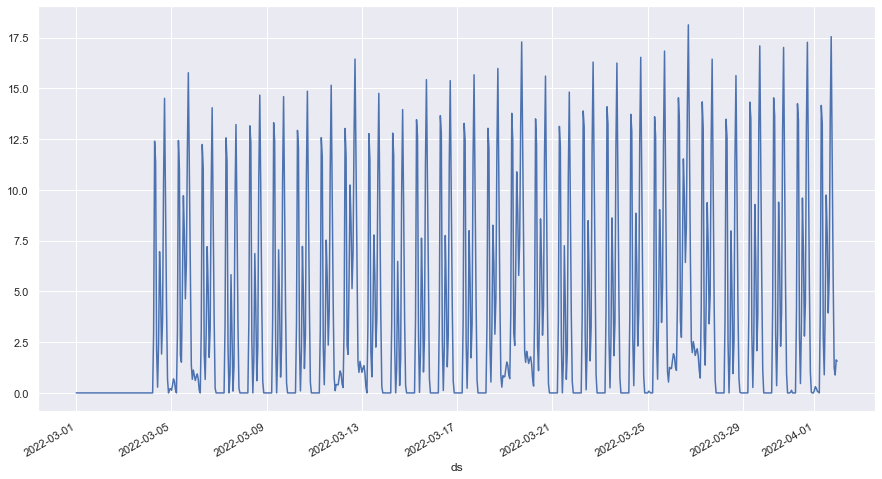

In [365]:
# plot prediction, 3*24 lags do not have any prediction
hour = yhatx_df_plot['sum'].copy()
hour.plot()

#### - result comparison with February

In [350]:
feb = df_wdc[top_10].copy()
feb['_date'] = pd.to_datetime(feb.index.values)
feb['_date'] = feb['_date'].dt.date
feb['_month'] = pd.DatetimeIndex(feb['_date']).month
feb['_year'] = pd.DatetimeIndex(feb['_date']).year
feb['_day'] = pd.DatetimeIndex(feb['_date']).day
feb = feb[feb['_month'].astype(str) == '2']
feb = feb[feb['_year'].astype(str) == '2022']
feb = feb[feb['_day'].astype(str) == '4']
feb_T = feb.drop(['_year', '_date', '_month'], axis=1)
feb_T = feb_T.T
feb_T['sum'] = feb_T.apply(np.sum, axis=1)
feb_T = feb_T.drop('_day', axis=0)

In [351]:
feb_T

,2022-02-04 00:00:00,2022-02-04 01:00:00,2022-02-04 02:00:00,2022-02-04 03:00:00,2022-02-04 04:00:00,2022-02-04 05:00:00,2022-02-04 06:00:00,2022-02-04 07:00:00,2022-02-04 08:00:00,2022-02-04 09:00:00,...,2022-02-04 15:00:00,2022-02-04 16:00:00,2022-02-04 17:00:00,2022-02-04 18:00:00,2022-02-04 19:00:00,2022-02-04 20:00:00,2022-02-04 21:00:00,2022-02-04 22:00:00,2022-02-04 23:00:00,sum
31248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
31214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,1.0,2.0,1.0,1.0,3.0,0.0,13.0
31241.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,...,0.0,0.0,2.0,3.0,1.0,1.0,1.0,1.0,0.0,18.0
31101.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,...,2.0,1.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,21.0
31229.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0,1.0,...,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,23.0
31247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
31201.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,0.0,3.0,0.0,3.0,0.0,1.0,7.0,2.0,1.0,27.0
31258.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
31200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,12.0
31623.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,1.0,...,1.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,24.0


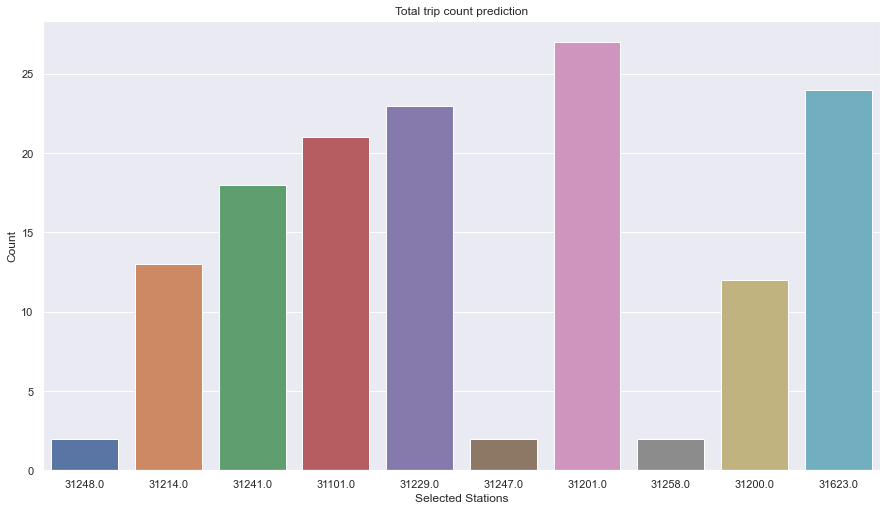

In [356]:
# create barplot for top 10 stations in February 2022
fig = sns.barplot(data=feb_T, x= feb_T.index, y ='sum' )
sns.set(rc={'figure.figsize':(15,8.27)})
plt.xlabel("Selected Stations")
plt.ylabel("Count")
plt.title("Total trip count prediction") # You can comment this line out if you don't need title
plt.show(fig)

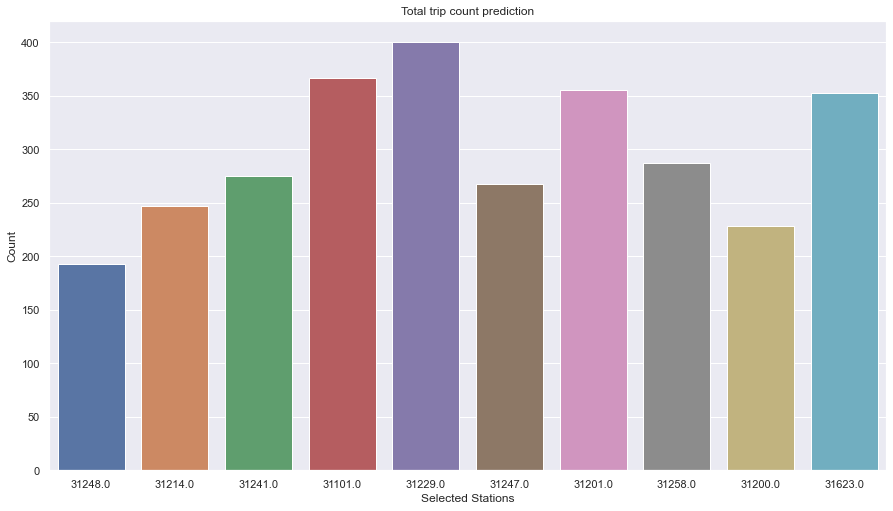

In [355]:
# create barplot for prediction of top 10 stations
fig = sns.barplot(data=yhatx_df3, x= yhatx_df3.index, y ='sum' )
sns.set(rc={'figure.figsize':(15,8.27)})
plt.xlabel("Selected Stations")
plt.ylabel("Count")
plt.title("Total trip count prediction") # You can comment this line out if you don't need title
plt.show(fig)